Actividad 5.1

Bernardo Quintana\
Camila Trujillo\
Mauricio Goris\
Fernando Guadarrama

In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
#Cargar archivo csv desde seaborn
df = pd.read_csv("DataAnalytics.csv")
df.head()

,Administrador,Usuario,botón correcto,tiempo de interacción,mini juego,número de interacción,color presionado,dificultad,fecha,Juego,auto push,tiempo de lección,tiempo de sesión
0,nicolas,nicolas,1.0,5.399169,Despegue,1.0,blue,Episodio 1,25/01/2024 09:26:42 a. m.,Astro,0.0,0.0,0.0
1,nicolas,nicolas,0.0,1.283400,Despegue,2.0,violet,Episodio 1,25/01/2024 09:26:46 a. m.,Astro,0.0,0.0,0.0
2,nicolas,nicolas,1.0,2.700226,Despegue,3.0,green,Episodio 1,25/01/2024 09:26:48 a. m.,Astro,0.0,0.0,0.0
3,nicolas,nicolas,0.0,3.050262,Despegue,4.0,green,Episodio 1,25/01/2024 09:26:57 a. m.,Astro,0.0,0.0,0.0
4,nicolas,nicolas,0.0,4.750256,Despegue,5.0,green,Episodio 1,25/01/2024 09:26:58 a. m.,Astro,0.0,0.0,0.0


In [4]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/4154069975.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/4154069975.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/4154069975.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")


In [5]:
# Variables numéricas y factores categóricos
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
factores = ['Juego', 'dificultad', 'mini juego']


ANÁLISIS DE VARIANZA PARA: tiempo de interacción ~ Juego
                sum_sq      df          F        PR(>F)
C(Juego)  6.413266e+03     1.0  30.613004  3.286152e-08
Residual  1.228268e+06  5863.0        NaN           NaN
→ Efecto significativo de Juego (p = 0.0000)

ANÁLISIS DE VARIANZA PARA: tiempo de interacción ~ dificultad
                     sum_sq      df          F        PR(>F)
C(dificultad)  5.807700e+04     3.0  96.432669  6.377241e-61
Residual       1.176604e+06  5861.0        NaN           NaN
→ Efecto significativo de dificultad (p = 0.0000)


/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/766092909.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/766092909.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]


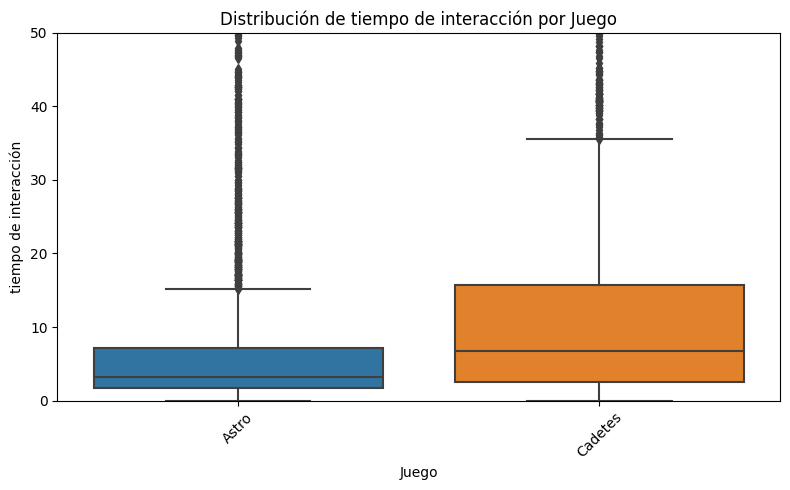

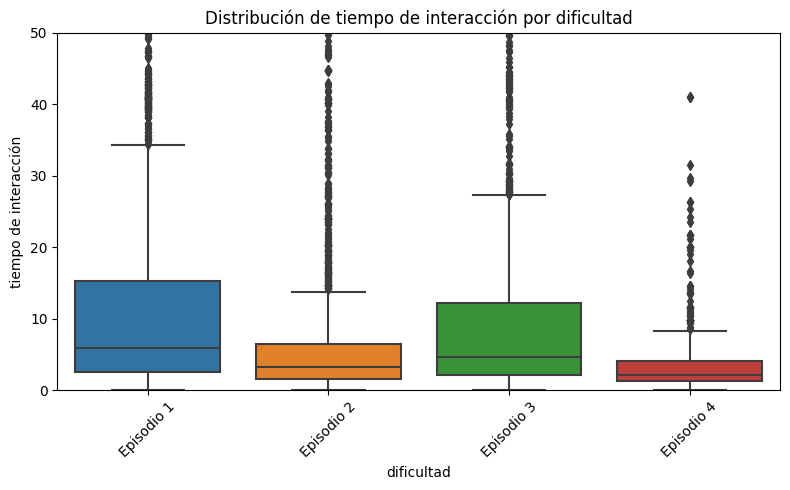

In [15]:
# Seleccionar variable y factores
variable = 'tiempo de interacción'  # <-- Ajusta según tu caso
factor1 = 'Juego'
factor2 = 'dificultad'

for factor in [factor1, factor2]:
    print(f"\nANÁLISIS DE VARIANZA PARA: {variable} ~ {factor}")
    try:
        formula = f'Q("{variable}") ~ C({factor})'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        p_val = anova_table["PR(>F)"][0]
        if p_val < 0.05:
            print(f"→ Efecto significativo de {factor} (p = {p_val:.4f})")
        else:
            print(f"→ No hay diferencias significativas para {factor} (p = {p_val:.4f})")

    except Exception as e:
        print(f"Error al analizar {factor}: {e}")

# Boxplot por Juego
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor1, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor1}')
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# Boxplot por Dificultad
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor2, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor2}')
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()




ANÁLISIS DE VARIANZA PARA: número de interacción ~ Juego
                sum_sq      df           F        PR(>F)
C(Juego)  1.318204e+05     1.0  148.539449  9.235165e-34
Residual  5.203082e+06  5863.0         NaN           NaN
→ Efecto significativo de Juego (p = 0.0000)

ANÁLISIS DE VARIANZA PARA: número de interacción ~ dificultad
                     sum_sq      df          F        PR(>F)
C(dificultad)  2.005787e+05     3.0  76.322388  2.006597e-48
Residual       5.134324e+06  5861.0        NaN           NaN
→ Efecto significativo de dificultad (p = 0.0000)


/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/3475112365.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/3475112365.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]


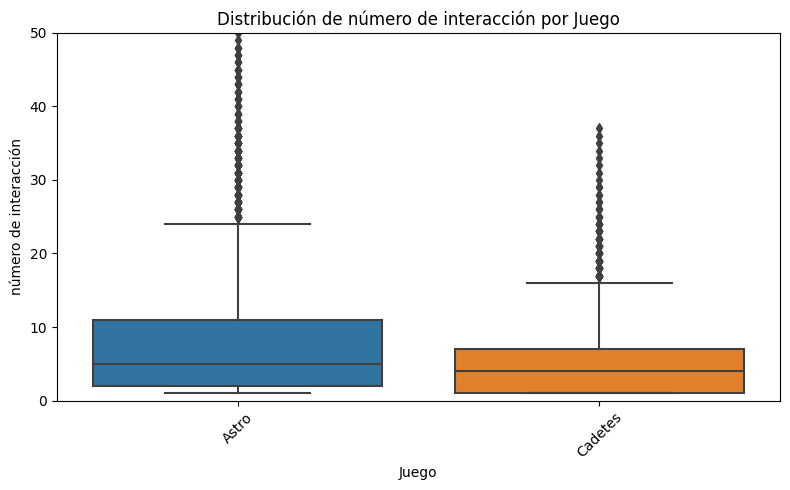

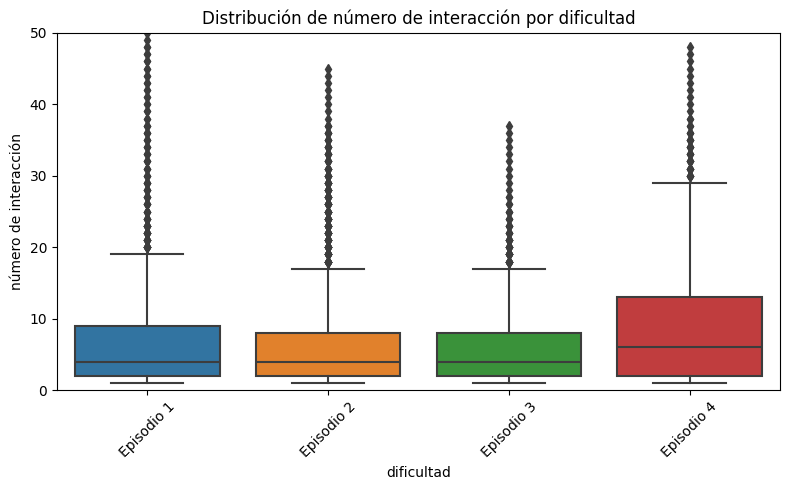

In [ ]:
# Seleccionar variable y factores
variable = 'número de interacción'  
factor1 = 'Juego'
factor2 = 'dificultad'

for factor in [factor1, factor2]:
    print(f"\nANÁLISIS DE VARIANZA PARA: {variable} ~ {factor}")
    try:
        formula = f'Q("{variable}") ~ C({factor})'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        p_val = anova_table["PR(>F)"][0]
        if p_val < 0.05:
            print(f"→ Efecto significativo de {factor} (p = {p_val:.4f})")
        else:
            print(f"→ No hay diferencias significativas para {factor} (p = {p_val:.4f})")

    except Exception as e:
        print(f"Error al analizar {factor}: {e}")

# Boxplot por Juego
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor1, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor1}')
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# Boxplot por Dificultad
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor2, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor2}')
plt.xticks(rotation=45)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()


ANÁLISIS DE VARIANZA PARA: auto push ~ Juego
             sum_sq      df         F        PR(>F)
C(Juego)   1.081671     1.0  95.89962  1.795800e-22
Residual  66.129924  5863.0       NaN           NaN
→ Efecto significativo de Juego (p = 0.0000)

ANÁLISIS DE VARIANZA PARA: auto push ~ dificultad
                  sum_sq      df         F    PR(>F)
C(dificultad)   0.100222     3.0  2.917532  0.032854
Residual       67.111373  5861.0       NaN       NaN
→ Efecto significativo de dificultad (p = 0.0329)


/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/1387616614.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/1387616614.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]


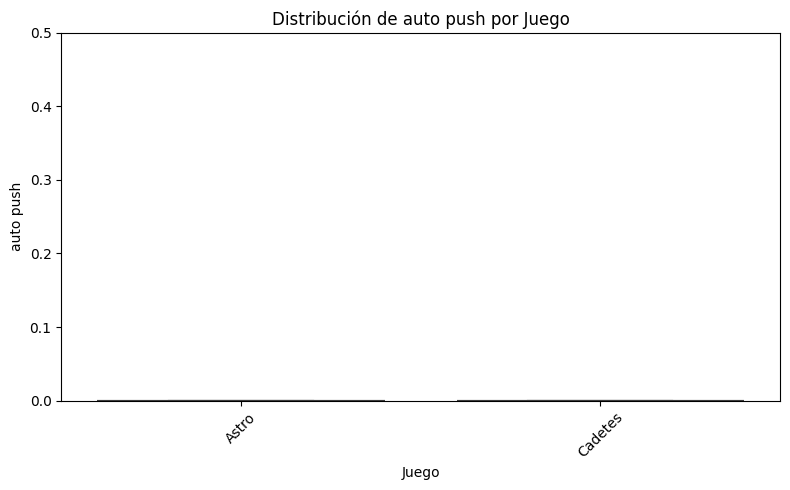

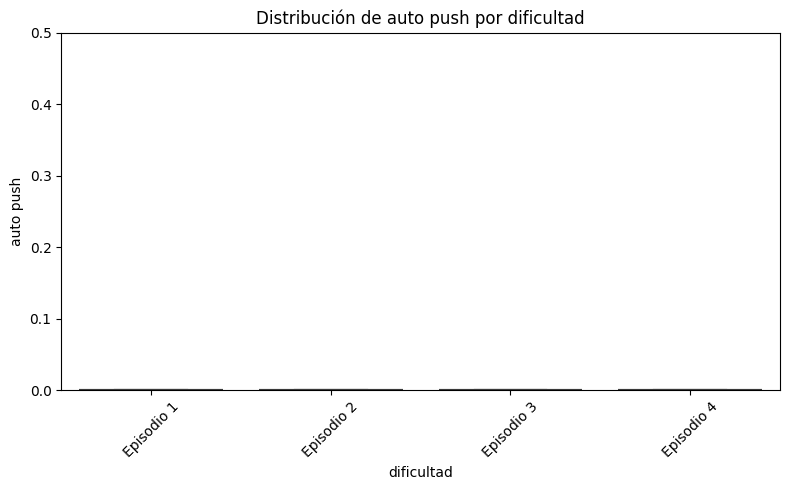

In [ ]:
# Seleccionar variable y factores
variable = 'auto push'  
factor1 = 'Juego'
factor2 = 'dificultad'

for factor in [factor1, factor2]:
    print(f"\nANÁLISIS DE VARIANZA PARA: {variable} ~ {factor}")
    try:
        formula = f'Q("{variable}") ~ C({factor})'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        p_val = anova_table["PR(>F)"][0]
        if p_val < 0.05:
            print(f"→ Efecto significativo de {factor} (p = {p_val:.4f})")
        else:
            print(f"→ No hay diferencias significativas para {factor} (p = {p_val:.4f})")

    except Exception as e:
        print(f"Error al analizar {factor}: {e}")

# Boxplot por Juego
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor1, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor1}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# Boxplot por Dificultad
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor2, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor2}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()


ANÁLISIS DE VARIANZA PARA: tiempo de lección ~ Juego
                sum_sq      df          F        PR(>F)
C(Juego)  1.964532e+04     1.0  30.039718  4.409445e-08
Residual  3.834273e+06  5863.0        NaN           NaN
→ Efecto SIGNIFICATIVO de Juego (p = 0.0000)

ANÁLISIS DE VARIANZA PARA: tiempo de lección ~ dificultad
                     sum_sq      df         F    PR(>F)
C(dificultad)  1.392242e+04     3.0  7.083281  0.000095
Residual       3.839996e+06  5861.0       NaN       NaN
→ Efecto SIGNIFICATIVO de dificultad (p = 0.0001)


/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/1076780787.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/1076780787.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]


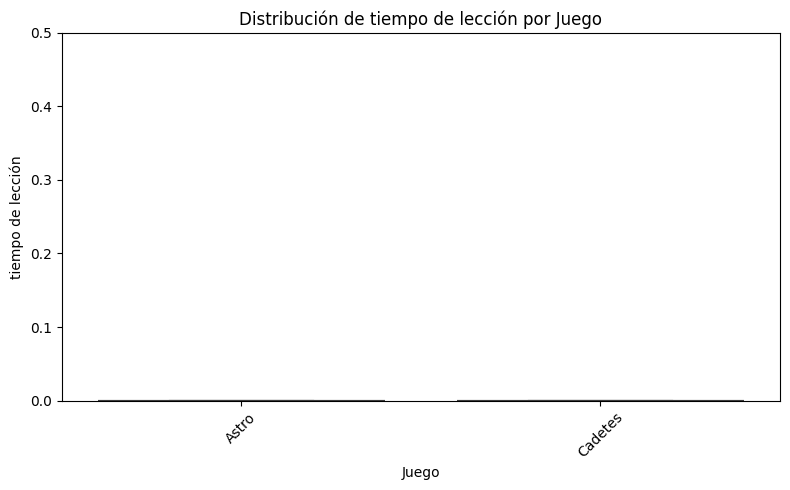

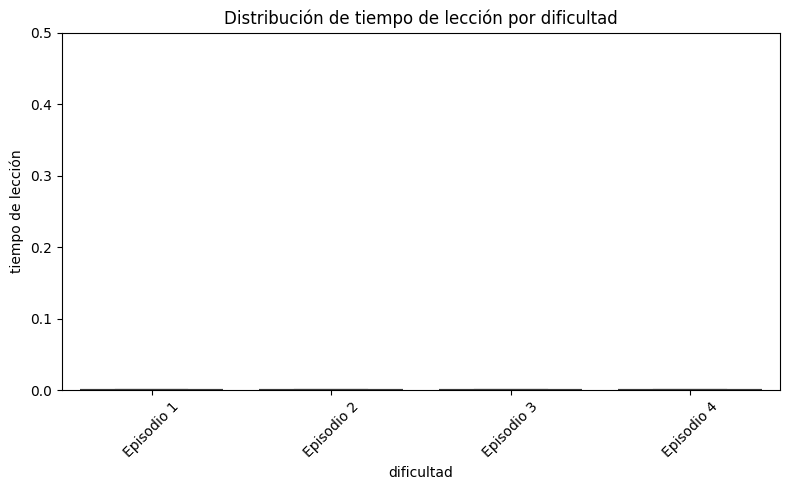

In [ ]:
# Seleccionar variable y factores
variable = 'tiempo de lección'  
factor1 = 'Juego'
factor2 = 'dificultad'

for factor in [factor1, factor2]:
    print(f"\nANÁLISIS DE VARIANZA PARA: {variable} ~ {factor}")
    try:
        formula = f'Q("{variable}") ~ C({factor})'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        p_val = anova_table["PR(>F)"][0]
        if p_val < 0.05:
            print(f"→ Efecto significativo de {factor} (p = {p_val:.4f})")
        else:
            print(f"→ No hay diferencias significativas para {factor} (p = {p_val:.4f})")

    except Exception as e:
        print(f"Error al analizar {factor}: {e}")

# Boxplot por Juego
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor1, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor1}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# Boxplot por Dificultad
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor2, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor2}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()



ANÁLISIS DE VARIANZA PARA: tiempo de sesión ~ Juego
                sum_sq      df         F    PR(>F)
C(Juego)  1.825828e+04     1.0  0.780762  0.376944
Residual  1.371075e+08  5863.0       NaN       NaN
→ No hay diferencias significativas para Juego (p = 0.3769)

ANÁLISIS DE VARIANZA PARA: tiempo de sesión ~ dificultad
                     sum_sq      df          F        PR(>F)
C(dificultad)  2.371981e+06     3.0  34.389101  5.029391e-22
Residual       1.347538e+08  5861.0        NaN           NaN
→ Efecto significativo de dificultad (p = 0.0000)


/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/3135399735.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]
/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_62969/3135399735.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table["PR(>F)"][0]


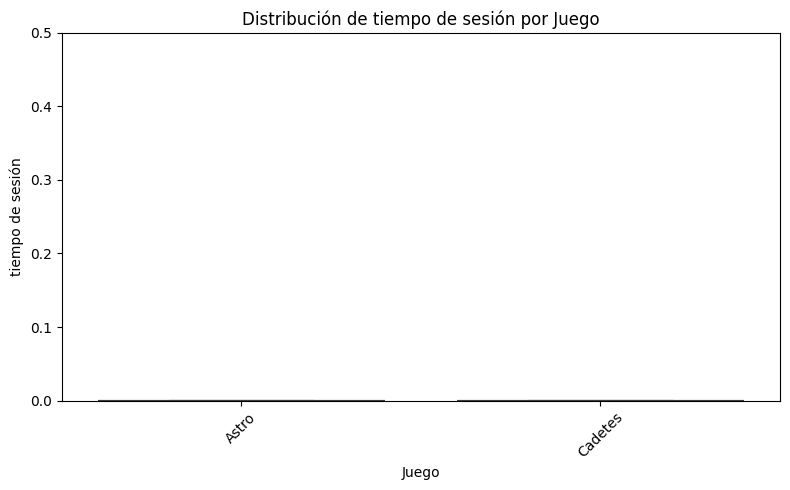

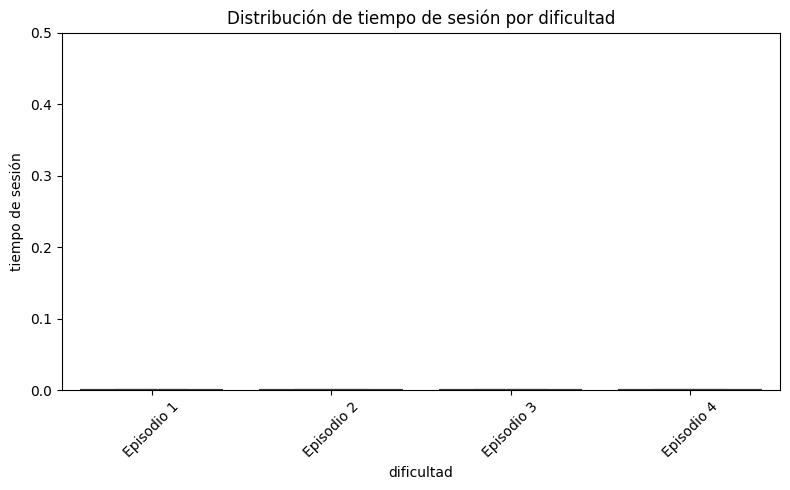

In [ ]:
# Seleccionar variable y factores
variable = 'tiempo de sesión' 
factor1 = 'Juego'
factor2 = 'dificultad'

for factor in [factor1, factor2]:
    print(f"\nANÁLISIS DE VARIANZA PARA: {variable} ~ {factor}")
    try:
        formula = f'Q("{variable}") ~ C({factor})'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        p_val = anova_table["PR(>F)"][0]
        if p_val < 0.05:
            print(f"→ Efecto significativo de {factor} (p = {p_val:.4f})")
        else:
            print(f"→ No hay diferencias significativas para {factor} (p = {p_val:.4f})")

    except Exception as e:
        print(f"Error al analizar {factor}: {e}")

# Boxplot por Juego
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor1, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor1}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()

# Boxplot por Dificultad
plt.figure(figsize=(8, 5))
sns.boxplot(x=factor2, y=variable, data=df)
plt.title(f'Distribución de {variable} por {factor2}')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.tight_layout()
plt.show()